In [54]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

# FreshRetailNet50k Analysis

In [55]:
df = pd.read_csv("/kaggle/input/retail/train.csv")
df.head()

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,stock_hour6_22_cnt,hours_stock_status,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",0,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]",1.0,0,0,1.6999,15.48,73.54,1.97
1,0,0,0,5,6,65,38,2024-03-29,0.1,"[0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1]",1.0,0,0,3.0190,15.08,76.56,1.71
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]",0,"[1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]",1.0,1,0,2.0942,15.91,76.47,1.73
3,0,0,0,5,6,65,38,2024-03-31,0.1,"[0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0...",11,"[0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]",1.0,1,0,1.5618,16.13,77.40,1.76
4,0,0,0,5,6,65,38,2024-04-01,0.2,"[0,0,0,0,0,0,0.1,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0...",8,"[1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]",1.0,0,0,3.5386,15.37,78.26,1.25


In [56]:
len(df)

4500000

<p style="font-size:16px">Let us see the no of unique cities, stores, and products </p>

In [57]:
print("Unique Cities:",df['city_id'].nunique())
print("Unique Stores:",df['store_id'].nunique())
print("Unique Products:",df['product_id'].nunique())

Unique Cities: 18
Unique Stores: 898
Unique Products: 865


<p style="font-size:16px"> Date Range </p>

In [58]:
print("Min Date",min(df['dt']),":","Max Date",max(df['dt']))

Min Date 2024-03-28 : Max Date 2024-06-25


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500000 entries, 0 to 4499999
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   city_id              int64  
 1   store_id             int64  
 2   management_group_id  int64  
 3   first_category_id    int64  
 4   second_category_id   int64  
 5   third_category_id    int64  
 6   product_id           int64  
 7   dt                   object 
 8   sale_amount          float64
 9   hours_sale           object 
 10  stock_hour6_22_cnt   int64  
 11  hours_stock_status   object 
 12  discount             float64
 13  holiday_flag         int64  
 14  activity_flag        int64  
 15  precpt               float64
 16  avg_temperature      float64
 17  avg_humidity         float64
 18  avg_wind_level       float64
dtypes: float64(6), int64(10), object(3)
memory usage: 652.3+ MB


In [60]:
df.isna().sum()

city_id                0
store_id               0
management_group_id    0
first_category_id      0
second_category_id     0
third_category_id      0
product_id             0
dt                     0
sale_amount            0
hours_sale             0
stock_hour6_22_cnt     0
hours_stock_status     0
discount               0
holiday_flag           0
activity_flag          0
precpt                 0
avg_temperature        0
avg_humidity           0
avg_wind_level         0
dtype: int64

<p style="font-size:16px"> Convert Dt Column to pd.datetime object </p>

In [61]:
df['dt'] = pd.to_datetime(df['dt'],yearfirst=True)

<p style="font-size:16px"> Summary statistics </p>

In [62]:
df.describe()

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,stock_hour6_22_cnt,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
count,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4500000,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06,4.500000e+06
mean,4.974420e+00,4.090807e+02,4.621640e+00,1.521366e+01,4.473508e+01,1.163621e+02,3.904260e+02,2024-05-11 12:00:00,9.985913e-01,3.180341e+00,9.111412e-01,3.444444e-01,3.784207e-01,3.698385e+00,2.227911e+01,7.445046e+01,1.724542e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2024-03-28 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.206000e+01,2.735000e+01,9.700000e-01
25%,0.000000e+00,1.950000e+02,3.000000e+00,5.000000e+00,2.800000e+01,7.700000e+01,1.350000e+02,2024-04-19 00:00:00,4.000000e-01,0.000000e+00,8.510000e-01,0.000000e+00,0.000000e+00,1.428800e+00,1.939000e+01,7.162000e+01,1.450000e+00
50%,0.000000e+00,3.950000e+02,6.000000e+00,1.600000e+01,3.800000e+01,1.110000e+02,3.630000e+02,2024-05-11 12:00:00,7.000000e-01,0.000000e+00,9.890000e-01,0.000000e+00,0.000000e+00,2.297700e+00,2.250000e+01,7.636000e+01,1.640000e+00
75%,1.200000e+01,5.980000e+02,6.000000e+00,2.100000e+01,6.600000e+01,1.670000e+02,6.330000e+02,2024-06-03 00:00:00,1.100000e+00,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.481600e+00,2.540000e+01,8.071000e+01,1.950000e+00
max,1.700000e+01,8.970000e+02,6.000000e+00,3.100000e+01,8.300000e+01,2.320000e+02,8.640000e+02,2024-06-25 00:00:00,4.490000e+01,1.600000e+01,1.088000e+00,1.000000e+00,1.000000e+00,4.250000e+01,3.088000e+01,1.000000e+02,3.850000e+00
std,6.096600e+00,2.485456e+02,1.962418e+00,8.972127e+00,2.233890e+01,5.756037e+01,2.634697e+02,NaN,1.406738e+00,4.596586e+00,1.281734e-01,4.751868e-01,4.849933e-01,3.683960e+00,3.593264e+00,1.009831e+01,3.845731e-01


<p style="font-size:16px"> This is interesting as we can see in the sale_amount column, the 75th quartile has value 0.11 and max value is 44.9, which is a huge difference, so either the product should be in high demand (price * no of orders = sale amnt) or the product should be priced high.</p>

In [63]:
df[df['sale_amount']==44.9]

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,stock_hour6_22_cnt,hours_stock_status,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
4132077,16,292,6,21,64,184,267,2024-06-23,44.9,"[0.6,0.5,0.1,0,0.2,0.1,1.1,3,3.6,5.6,6.1,2.8,2...",0,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]",0.0,1,0,9.9771,26.99,85.82,1.52


Lets us compare this amount to normal average of this product

In [64]:
extracted = df[(df['product_id']==267)]['sale_amount']
length = len(extracted) -1
sum = extracted.sum() - 44.9

print(sum/length)

15.552650776147255


<p style="font-size:16px"> Here in this data we have no information regarding product amount, so we assume that this product is an essential daily product such as milk that is why this product has higher sale amount than other products. </p>

<Axes: title={'center': 'Product No 267 Sales Distribution'}, xlabel='sale_amount', ylabel='Count'>

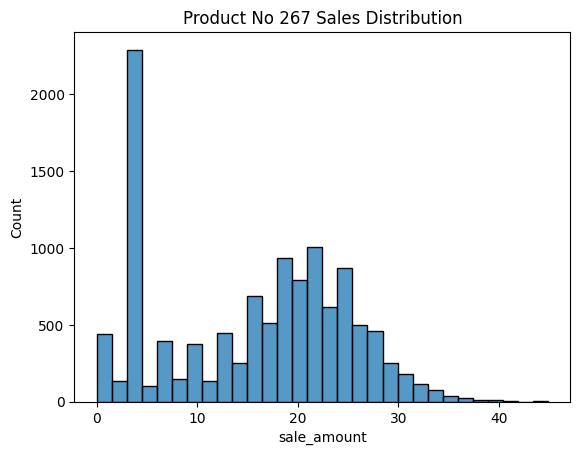

In [65]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.title("Product No 267 Sales Distribution")
sn.histplot(data=extracted)

Text(0.5, 0, 'Other Categories Sales')

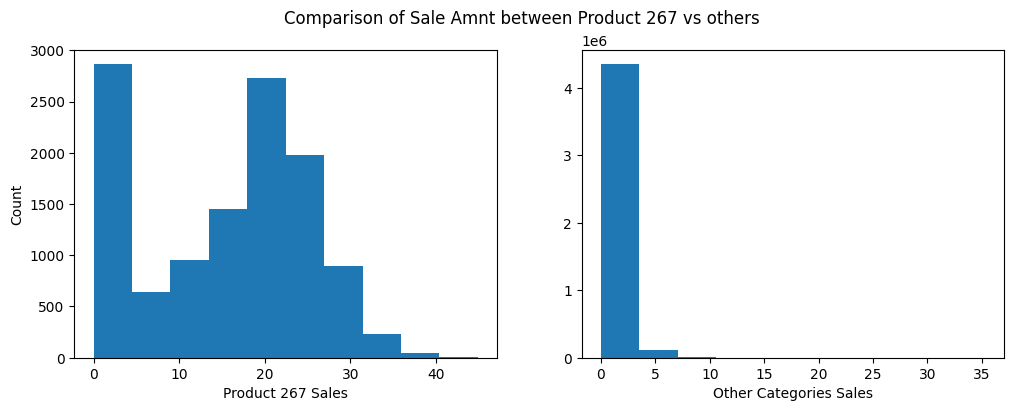

In [66]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
fig.suptitle('Comparison of Sale Amnt between Product 267 vs others \n')
axes[0].hist(df[df['product_id']==267]['sale_amount'])
axes[0].set_xlabel('Product 267 Sales')
axes[0].set_ylabel('Count')
axes[1].hist(df[df['product_id']!=267]['sale_amount'])
axes[1].set_xlabel('Other Categories Sales')

<p style="font-size:14px"> From this it is evident that this product has higher sale amount in average as most of its value are over 1 (normalized sale value) which is a strong indicator </p>

<h2> Exploratory Data Analysis </h2>

<p style="font-size:16px"> We will use a sample of our dataset for visualization and entire dataset when we want to know more about the facts </p>

In [67]:
sampled_df = df.sample(n=15000)

In [68]:
df['management_group_id'].nunique()

7

<p style="font-size:16px"> We will use management group id as category of the products and do further analysis </p>

<p style="font-size:16px"> <strong> Category vs Sales </strong> </p>

<Axes: xlabel='management_group_id', ylabel='sale_amount'>

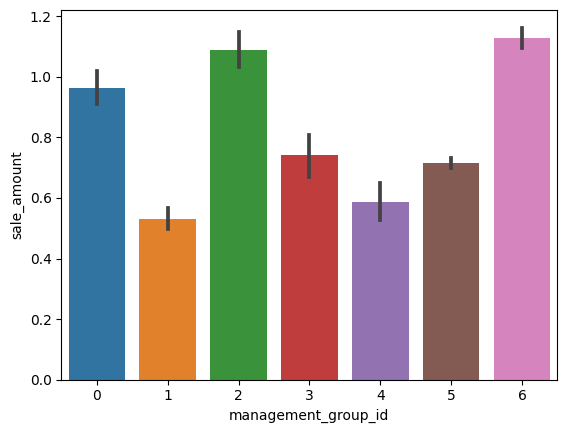

In [69]:
sn.barplot(data=sampled_df,x='management_group_id',y='sale_amount')

<p style="font-size:16px">How Holiday affects the sales? </p>

<Axes: xlabel='holiday_flag', ylabel='sale_amount'>

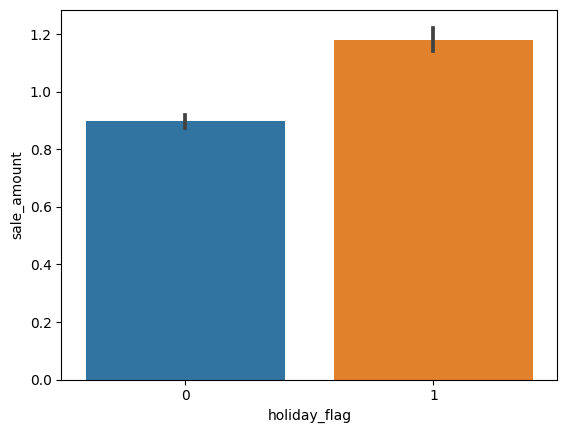

In [70]:
sn.barplot(data=sampled_df,x='holiday_flag',y='sale_amount')

<p style="font-size:16px"> Holidays have more demand </p>

<Axes: xlabel='management_group_id', ylabel='sale_amount'>

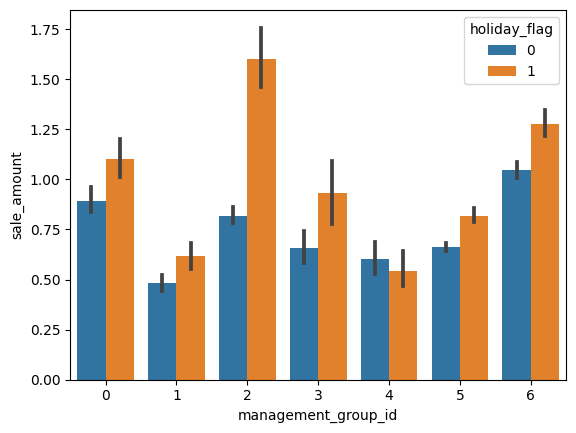

In [71]:
sn.barplot(data=sampled_df,x='management_group_id',y='sale_amount',hue='holiday_flag')

<p style="font-size:16px"> <strong>Discount vs Non Discount</strong> </p>

<p style="font-size:16px"> Here Discount =1 means no discount from there on Discount = 0.9 means 10% </p>

In [72]:
free_products = df[df['discount']==0]

In [73]:
free_products[['management_group_id']].groupby('management_group_id').value_counts()

management_group_id
0      119
5        1
6    15919
Name: count, dtype: int64

<p style="font-size:16px"> We have some products available at 100% discount (free), with some products having sale amount >0 which is not possible.
Lets safely drop out the data. </p>

In [74]:
df.drop(free_products.index,inplace=True)

In [75]:
sampled_df.drop(sampled_df[sampled_df['discount']==0].index,inplace=True)

<p style="font-size:16px"> After dropping, let’s analyze which category has the highest number of records with discount rates below 0.1 (i.e., discounts of 90% or more). </p>

In [76]:
df[df['discount']<0.1][['management_group_id']].groupby('management_group_id').value_counts()

management_group_id
0    52
5     2
Name: count, dtype: int64

In [77]:
df[(df['management_group_id']==0)&(df['discount']>0.1)]['sale_amount'].mean()

0.9199556351945077

In [78]:
df[(df['management_group_id']==0)&(df['discount']<0.1)]['sale_amount'].mean()

2.6473076923076917

In [79]:
df[df['discount']<0.1].describe()

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,stock_hour6_22_cnt,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54,54.000000,54.000000,54.000000,54.000000,54.0,54.000000,54.000000,54.000000,54.000000
mean,3.648148,662.037037,0.185185,5.388889,7.925926,65.629630,804.166667,2024-05-07 12:00:00,2.605556,0.314815,0.062796,0.462963,1.0,1.193461,22.548704,36.693519,1.548148
min,0.000000,21.000000,0.000000,5.000000,6.000000,11.000000,244.000000,2024-04-17 00:00:00,0.700000,0.000000,0.010000,0.000000,1.0,0.000000,19.470000,27.350000,1.100000
25%,3.000000,711.000000,0.000000,5.000000,7.000000,66.000000,860.000000,2024-05-03 06:00:00,1.905000,0.000000,0.047000,0.000000,1.0,0.493200,22.155000,29.987500,1.420000
50%,3.000000,753.500000,0.000000,5.000000,7.000000,66.000000,860.000000,2024-05-05 00:00:00,2.580000,0.000000,0.066000,0.000000,1.0,0.747650,22.425000,33.545000,1.540000
75%,3.000000,820.750000,0.000000,5.000000,7.000000,66.000000,860.000000,2024-05-06 00:00:00,3.035000,0.000000,0.083000,1.000000,1.0,0.864075,22.610000,37.355000,1.670000
max,17.000000,878.000000,5.000000,16.000000,43.000000,105.000000,861.000000,2024-06-12 00:00:00,5.200000,12.000000,0.099000,1.000000,1.0,9.337000,27.470000,82.600000,2.780000
std,2.947064,256.755516,0.953129,2.003927,5.456005,9.257931,176.549288,NaN,1.019022,1.657733,0.022784,0.503308,0.0,1.811019,1.714647,12.929850,0.243272


<p style="font-size:16px"> Marketing Activities helps to boost sales of the discounted products. <br>
Maybe the products in the category are perishable at its last periods before expiring, so heavy discount may be provided as temperature,humidity,wind does not account for significance. <br>
Another interesting pattern to note is this happens most of the time in city 3. </p>

In [80]:
print("Discount less than 50% sales",df[df['discount']>0.5]['sale_amount'].mean())
print("Discount greater than 50% sales",df[df['discount']<0.5]['sale_amount'].mean())


Discount less than 50% sales 0.9446573426996734
Discount greater than 50% sales 2.1599194259096057


<p style="font-size:16px"> As expected when discount is high the sales of the products in the category is high. </p>

<p style="font-size:16px"> <strong> Temp vs Sales </strong> </p>

<Axes: xlabel='temp_binned', ylabel='sale_amount'>

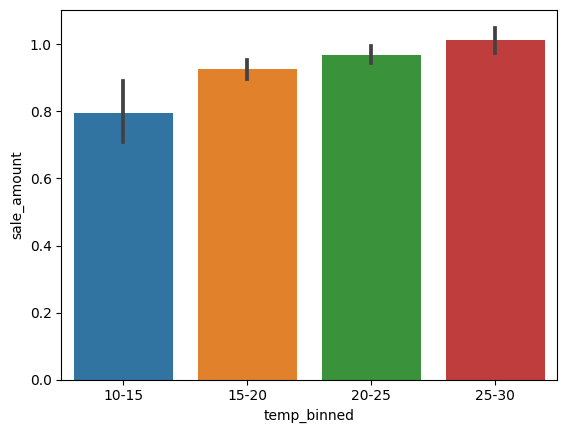

In [81]:
sampled_df['temp_binned'] = pd.cut(sampled_df['avg_temperature'],[10,16,21,26,31],include_lowest=True,right=False,labels=['10-15','15-20','20-25','25-30'])
sn.barplot(data=sampled_df,x='temp_binned',y='sale_amount')

<p style="font-size:16px">We can see the sales is lowest in 10-15 bin range compared to other bin range where the difference between the sales is not significant.</p>

<Axes: xlabel='humidity_binned', ylabel='sale_amount'>

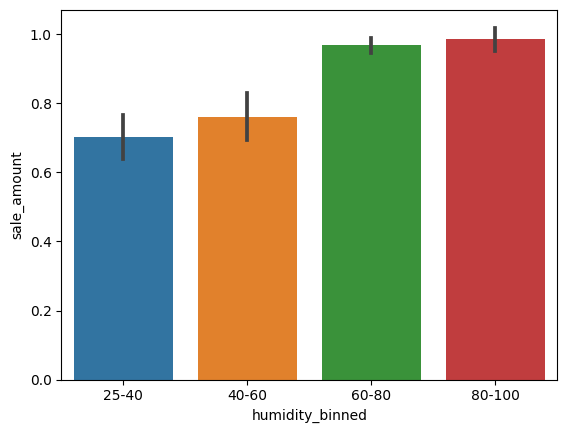

In [82]:
sampled_df['humidity_binned'] = pd.cut(sampled_df['avg_humidity'],[25,41,61,81,101],include_lowest=True,right=False,labels=['25-40','40-60','60-80','80-100'])
sn.barplot(data=sampled_df,x='humidity_binned',y='sale_amount')

<p style="font-size:16px">We can generalize that when humidity is 60 and above the sales is high.</p>

<Axes: xlabel='city_id', ylabel='sale_amount'>

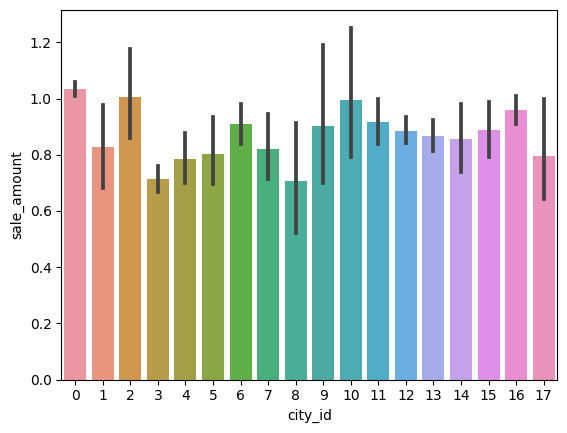

In [83]:
sn.barplot(data=sampled_df,x='city_id',y='sale_amount')

<p style="font-size:16px"> City 4 have highest sales </p>
<p style="font-size:16px">City 3 has the lowest sales </p>

<p style="font-size:16px"> <strong>Precipitation vs Sales</strong></p>

<Axes: xlabel='prec_binned', ylabel='sale_amount'>

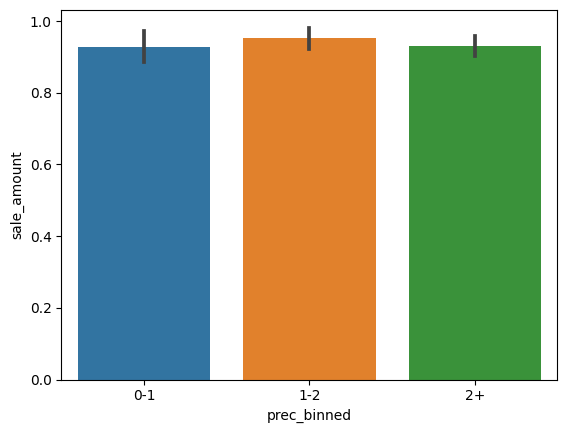

In [84]:
sampled_df['prec_binned'] = pd.cut(sampled_df['precpt'],[0,1.1,2.1,5],include_lowest=True,right=False,labels=['0-1','1-2','2+'])
sn.barplot(data=sampled_df,x='prec_binned',y='sale_amount')

<p style="font-size:16px"> Looks like precipitation does not impact the sales much.<br>
But as we saw earlier, this dataset contains information only for the 4 months from March to June, so we cannot conclude that precipitation does not affect sales. With more months of information, we can understand the true impact of precipitation; moreover, these months are considered to be summer. </p>

<Axes: xlabel='dayofweek', ylabel='sale_amount'>

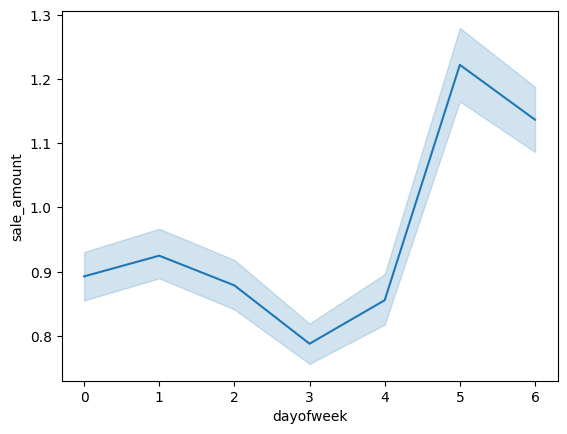

In [85]:
sampled_df['dayofweek'] = sampled_df['dt'].dt.dayofweek
sn.lineplot(data=sampled_df,x='dayofweek',y='sale_amount')

<p style="font-size:16px"> Sale is lowest on Thursday and highest on Sunday, and weekends produce higher sales than weekdays. </p>

In [86]:
df[(df['discount']<0.5) & (df['activity_flag']==0)]['sale_amount'].mean()

0.7

In [87]:
df[(df['discount']<0.5) & (df['activity_flag']==1)]['sale_amount'].mean()

2.160103248552002

In [88]:
def str_to_list(x):
    x = x.split(',')
    li = []
    li.append(float(x[0][1]))
    for i in range(1,len(x)-1):
         li.append(float(x[i]))
    li.append(float(x[23][0]))
    return li


sampled_df['hours_sale'] = sampled_df['hours_sale'].apply(str_to_list)
sampled_df['hours_stock_status'] = sampled_df['hours_stock_status'].apply(str_to_list)

In [89]:

def flatten_hourly(df):
    n = len(df)
    flat_df = pd.DataFrame({
        'management_group_id': np.repeat(df['management_group_id'].values, 24),
        'first_category_id': np.repeat(df['first_category_id'].values, 24),
        'second_category_id': np.repeat(df['second_category_id'].values, 24),
        'third_category_id': np.repeat(df['third_category_id'].values, 24),
        'product_id': np.repeat(df['product_id'].values, 24),
        'dt': np.repeat(df['dt'].values, 24),
        'hour': list(range(24)) * n,
        'hourly_sale': np.concatenate(df['hours_sale'].values),
        'hourly_stockout': np.concatenate(df['hours_stock_status'].values),
        'discount': np.repeat(df['discount'].values, 24),
        'holiday_flag': np.repeat(df['holiday_flag'].values, 24),
        'activity_flag': np.repeat(df['activity_flag'].values, 24),
        'precpt': np.repeat(df['precpt'].values, 24),
        'avg_temperature': np.repeat(df['avg_temperature'].values, 24),
        'avg_humidity': np.repeat(df['avg_humidity'].values, 24),
        'avg_wind_level': np.repeat(df['avg_wind_level'].values, 24)
    })
    return flat_df

sampled_df = flatten_hourly(sampled_df)


<p style="font-size:16px"> <strong>Hour vs Sales</strong></p>

<Axes: xlabel='hour', ylabel='hourly_sale'>

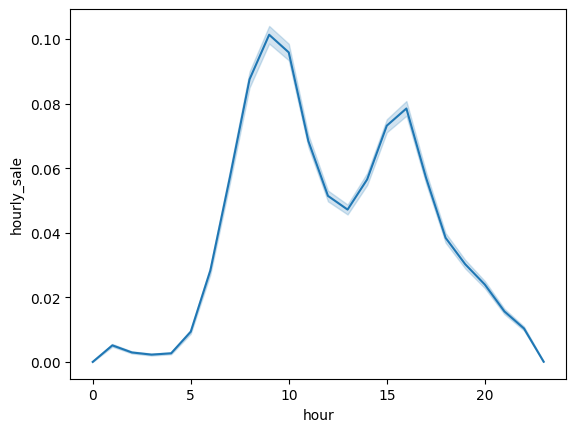

In [90]:
sn.lineplot(data=sampled_df,x='hour',y='hourly_sale')

<p style="font-size:16px">We can observe double peak distribution, the first peak during the morning hours and the next one during the afternoon hours, especially from 2 to 4. Sales during other times are comparatively low. </p>

<p style="font-size:16px"> <strong>Final Observations</strong> </p>


<p style="font-size:16px">1) Holiday affects the sales positively.</p>
<p style="font-size:16px">2) Temperature: On colder days sales are low (10-15) compared to warmer days (20-30).</p>
<p style="font-size:16px">3) Humidity: Humidity also affects the sales; when humidity is low, sales are also low (colder temp).</p>
<p style="font-size:16px">4) Activity Flag: Activity or promotion increases the sales of the product.</p>
<p style="font-size:16px">5) Precipitation: Does not affect the sales</p>
<p style="font-size:16px">6) Time: Higher sales volume observed during morning and afternoon hours than other times</p>
<p style="font-size:16px">7) Day: Weekends have more sales than weekdays.</p>

<p style="font-size:16px"> <strong> Modelling </strong> </p>

<p style="font-size:16px">Scenario: The company needs a sales forecast of products to better optimize inventory.</p>
<p style="font-size:16px">We will randomly pick a store and product and will forecast its demand.</p>

<p style="font-size:16px"> <strong> 2-Level Model for Sales Forecast </strong> </p>

<p style="font-size:16px"> 1) Latent Demand Recovery: As suggested in the paper, estimating the true demand of the products during stockout hours and using the modified data will help the model to better understand actual demand patterns. Also, experimental results show that this approach achieves a 2.73% improvement in prediction accuracy while reducing the systematic demand underestimation from 7.37% to near-zero bias. We will use a simple mean filling strategy to fill out sales during stockout hours and then use it for further modeling. There are a variety of other methods we can use, but let's stick to it. </p>

<p style="font-size:16px"> 2) Use the modified data after latent demand recovery for forecasting sales of the products. </p>

In [91]:
train_df = df[(df['store_id']==234)&(df['product_id']==4)]

In [92]:
train_df.shape

(90, 19)

Drop full stockout days

In [93]:
train_df.drop(train_df[train_df['stock_hour6_22_cnt']==16].index,inplace=True)

In [94]:
den = 16 - train_df['stock_hour6_22_cnt']
num = train_df['stock_hour6_22_cnt']

train_df.loc[:, 'sale_amount'] = train_df['sale_amount'] + (train_df['sale_amount']/den)*num


In [95]:
train_df['day_of_week'] = train_df['dt'].dt.dayofweek
train_df['month'] = train_df['dt'].dt.month
train_df['day'] = train_df['dt'].dt.day

In [96]:
features_to_drop = ["city_id",'store_id','product_id',"hours_stock_status","hours_sale","management_group_id","first_category_id","second_category_id","third_category_id","stock_hour6_22_cnt"]

train_df.drop(features_to_drop,axis=1,inplace=True)

Lag Features

In [97]:
train_df['lag_1'] = train_df['sale_amount'].shift(1)
train_df['lag_7'] = train_df['sale_amount'].shift(7)
train_df.dropna(inplace=True)

In [98]:
max(train_df['dt'])

Timestamp('2024-06-25 00:00:00')

In [99]:
min(train_df['dt'])

Timestamp('2024-04-04 00:00:00')

Train on 72 days and test on 10 days

In [100]:
train_set = train_df[train_df['dt'] < pd.to_datetime('2024-06-16')].copy()

In [101]:
test_set = train_df[train_df['dt'] > pd.to_datetime('2024-06-15') ].copy()

In [102]:
train_set

,dt,sale_amount,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level,day_of_week,month,day,lag_1,lag_7
977857,2024-04-04,11.885714,0.876,1,1,1.3025,16.08,74.25,1.47,3,4,4,3.400000,2.200000
977858,2024-04-05,7.111111,0.877,1,1,1.9102,16.24,71.98,1.46,4,4,5,11.885714,4.600000
977859,2024-04-06,6.200000,0.876,1,1,2.4003,16.72,78.41,1.67,5,4,6,7.111111,3.100000
977860,2024-04-07,1.257143,0.876,0,1,2.0337,16.55,79.62,1.23,6,4,7,6.200000,7.630769
977861,2024-04-08,5.440000,0.867,0,0,1.4172,16.21,77.21,1.23,0,4,8,1.257143,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977925,2024-06-11,0.700000,0.830,0,1,5.6874,25.24,76.95,1.64,1,6,11,7.822222,2.600000
977926,2024-06-12,0.300000,0.802,0,1,5.4845,25.59,80.73,1.50,2,6,12,0.700000,1.200000
977927,2024-06-13,1.386667,0.817,0,1,7.5658,26.25,80.28,1.66,3,6,13,0.300000,0.300000
977928,2024-06-14,1.454545,0.802,0,1,6.4890,26.67,78.55,1.77,4,6,14,1.386667,4.184615


In [103]:
train_set.drop(['dt'],axis=1,inplace=True)
test_set.drop(['dt'],axis=1,inplace=True)

In [105]:
train_target = train_set[['sale_amount']]
train_set.drop(['sale_amount'],axis=1,inplace=True)

test_target = test_set[['sale_amount']]
test_set.drop(['sale_amount'],axis=1,inplace=True)

In [106]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(train_set,train_target)

RandomForestRegressor()

In [107]:
predictions = rfr.predict(test_set)

In [108]:
from sklearn.metrics import mean_squared_error
print("RMSE SCORE:", np.sqrt(mean_squared_error( test_target['sale_amount'], predictions)))

RMSE SCORE: 4.455367299585404


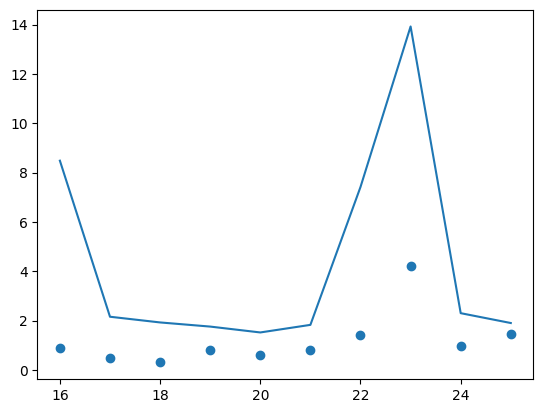

In [109]:
plt.scatter(x=range(16,26),y=test_target)
plt.plot(range(16,26),predictions)

In [113]:
import lightgbm as lgb
model = lgb.LGBMRegressor(verbosity=-1)
model.fit(train_set,train_target)

LGBMRegressor(verbosity=-1)

In [114]:
predictions = model.predict(test_set)
print("RMSE SCORE:", np.sqrt(mean_squared_error( test_target['sale_amount'], predictions)))

RMSE SCORE: 2.4987750400340625


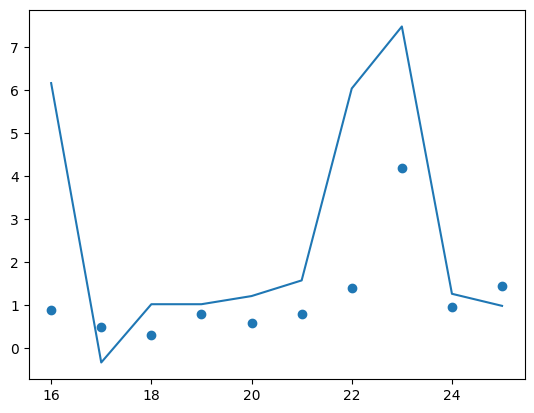

In [115]:
plt.scatter(x=range(16,26),y=test_target)
plt.plot(range(16,26),predictions)

**Thank You!!**